# Section 2.1 — Probability theory

This notebook contains all the code examples from [Section 2.1 Probability theory]() in the **No Bullshit Guide to Statistics**.

Topics covered in this notebook:
- Examples of random variables
- Calculus review
  - Math definitions
  - Numerical integration using the `scipy.integrate` functions `quad` and `trapz`
  - Symbolic integration using the `sympy` function `integrate`
- Probability calculations
- Probability models for real-world quantities
- Computer models for random variables 
  - Overview of `scipy.stats.distributions` methods
  - Example of calculations
- Discussion
  - More calculus topics
  - Bulk and tails of the normal distribution
  - Interpretations of probability theory


#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

# %config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(3)

### What is probability theory?

- definition: **probability theory is a language for describing uncertainty, variability, and randomness**

- Originally the study of "randomness" and "expectations" started to quantify random events in gambling.

- Later extended to as a general purpose tool to model any process that contains uncertainty:
  - random variables = described by probability distribution (CDF, pmf/pdf) modelled as a math function with parameters $\theta$
  - noise = can be modelled as a random variable
  - sampling = variations due to random selection of a subset from the population
  - beliefs = can be described as probability distributions


- Probability theory is an essential tool for statistics.

- Probability theory is also a foundational subject that used in physics, machine learning, biology, optimization, algorithms, etc. (side note: in terms of usefulness, I'd say probability theory is up there with linear algebra—you need to know this shit!)



## Definitions


### Random variables

- *random variable* $X$:
  a quantity that can take on different values.
- **outcome**: a particular value $\{X = x\}$ or range of values $\{a \leq X \leq b\}$ that can occur
					as a result of observing the random variable $X$.
- **sample space** $\mathcal{X}$: describes the set of all possible outcomes of the random variable.
- **$f_X$**: the \emph{probability distribution function}
  is a function that assigns probabilities to the different outcome in the sample space of a random variable.
  The probability distribution function of the random variable $X$
  is a function of the form $f_X: \mathcal{X} \to \mathbb{R}$.
- $F_X$:
  the \emph{cumulative distribution function} (CDF) tells us the probability of an outcome
  less than or equal to a given value: $F_X(b) = Pr(\{ X \leq b \})$.
- $F_X^{-1}$:
  the inverse cumulative distribution function computes contains the information
  about the quantiles of the probability distribution.
  The value $F_X^{-1}(q)=x_q$ tells how far you need to go in the sample space
  so that the event $\{ X \leq x_q \}$ contains a proportion $q$ of the total probability:
  $\Pr(\{ X \leq x_q \})=q$.
- $\mathbb{E}_X[w]$:
  the *expected value* of the function $w(X)$
  computes the average value of $w(X)$ computed for all the possible values of the random variable $X$.





#### Example 1: Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(0,1)$ is described by the following probability density function:
$$
  p_U(u) =
  \begin{cases}
      1 & \mathrm{for}\ 0 \le u \le 1, \\
      0 & \mathrm{for}\ u<0\ \mathrm{or}\ u>1.
  \end{cases}
$$
where $U$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U=u\}$.
For a uniform distribution $\mathcal{U}(0,1)$, each $u$ between 0 and 1 is equally likely to occur,
and values of $u$ outside this range have zero probability of occurring.

In [4]:
from scipy.stats.distributions import uniform

rvU = uniform(0, 1)

from scipy.integrate import quad
quad(rvU.pdf, 0, 0.5)[0]

0.5

#### Example 2: Normal distribution

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:
$$ \Large
    p_N(n) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(n-\mu)^2}{2\sigma^2}}.
$$

The mean $\mu$ (the Greek letter *mu*) and the standard deviation $\sigma$ (the Greek letter *sigma*) are called the parameters of the distribution.

The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions,
and $N \sim \mathcal{N}(1000, 100)$ is a particular instance of the distribution with mean $\mu = 1000$ and standard deviation $\sigma = 100$.

In [5]:
from scipy.stats.distributions import norm

rvN = norm(1000, 100)

quad(rvN.pdf, 800, 900)[0]

0.13590512198327784

#### Example 3: Coin flip

Consider the random variable $C$ that describes the outcome of a coin flip for a balanced (fair) coin.
The sample space for the random variable $C$ is $\{\texttt{heads}, \texttt{tails}\}$.

The probability mass function is
$$
    f_C(\texttt{heads}) = 0.5
    \quad
    \textrm{and}
    \quad
    f_C(\texttt{tails}) = 0.5.
$$

In [6]:
from scipy.stats.distributions import randint

rvC = randint(0, 2)

In [7]:
for c in range(0,2):
    print(c, rvC.pmf(c))

0 0.5
1 0.5


#### Example 4: Rolling a six-sided die

The random outcome that occurs when we roll a six-sided die can be described as a random variable $D$
which has the sample space $\{1, 2, 3, 4, 5, 6\}$.
If we assume the die is fair,
then each of the outcomes will have equal weight,
so the probability mass function $f_D$ has the following values:

$$
    f_D(1)\!=\!\tfrac{1}{6},
    \ 
    f_D(2)\!=\!\tfrac{1}{6},
    \ 
    f_D(3)\!=\!\tfrac{1}{6},
    \ 
    f_D(4)\!=\!\tfrac{1}{6},
    \ 
    f_D(5)\!=\!\tfrac{1}{6},
    \ 
    f_D(6)\!=\!\tfrac{1}{6}.
$$

In [8]:
rvD = randint(1, 7)

In [9]:
for d in range(1,7):
    print(d, rvD.pmf(d))

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


## Calculus prerequisites

(see formulas and definitions in the book)

### Sets


In [10]:
S = {1, 2, 3}
T = {3, 4, 5, 6}

print("S ∪ T =", S.union(T))
print("S ∩ T =", S.intersection(T))
print("S \ T =", S.difference(T))

S ∪ T = {1, 2, 3, 4, 5, 6}
S ∩ T = {3}
S \ T = {1, 2}


### Functions

In Python, we define functions using the `def` keyword.

For example, the code cell below defines the function $g(x)=x$,
then evaluate it for the input $x=4$.

In [11]:
# define the function g that takes input x
def g(x):
    return x

# calling the function g on input x=4
g(4)

4

#### Plotting the graph of the function $g(x)$

The graph of the function $g(x)$ is obtained by plotting a line that passes through the set of input-output coordinate pairs $(x, g(x))$.

<AxesSubplot:>

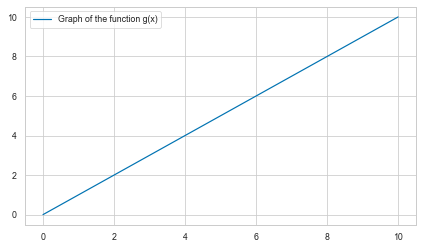

In [12]:
import numpy as np
import seaborn as sns

xs = np.linspace(0, 10, 100)
ys = g(xs)


sns.lineplot(x=xs, y=ys, label="Graph of the function g(x)")

The function `linspace(0,10,100)` creates an array of `100` points in the interval $[0,10]$.
We store this sequence of inputs into the variable `xs`.
Next, we computer the output value $y = g(x)$ for each of the inputs in the array `xs`,
and store the result in the array `ys`.
Finally, we use the function `sns.lineplot()` to generate the plot.

In [13]:
# import matplotlib.pyplot as plt
# filename = "figures/graph_of_function_g_eq_x.pdf"

# with plt.rc_context({"figure.figsize":(4,4)}):
#     ax = sns.lineplot(x=xs, y=ys, label="Graph of the function g(x)")
#     ax.figure.tight_layout()
#     ax.set_xlabel('x')
#     ax.set_ylabel('g(x)')
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [14]:
import numpy as np

np.sqrt(4)

2.0

In [15]:
np.log(4)

1.3862943611198906

Examples of function-followed-by-inverse-function calculations:

In [16]:
np.sqrt(4)**2

4.0

In [17]:
np.exp(np.log(4))

4.0

### Computing integrals geometrically


See Figure 2.15 in the book that shows the integral under $f(x) = 3$ between $a=0$ and $b=5$.



See also Figure 2.16 that shows the integral under $g(x) = x$ between $a=0$ and $b=5$.


### Computing integrals numerically using SciPy `integrate` methods

There are numerous ways to compute integrals in Python. 
Computing integrals "numerically" means we're splitting the region of integration into thousands or millions of sub-regions, computing the areas of these sub-regions, and adding up the result.

We'll now show some examples using two of the functions form the module `sympy.integrate`:
- `quad(f,a,b)`: high-level function for computing areas (quadratures)
- `trapz(ys,xs)`: low-level function for computing integral using trapezoid approximation



We'll start with the `quad` function.

In [18]:
from scipy.integrate import quad

In [19]:
# define the constant function f(x) = c
def f(x):
    c = 3
    return c

# call the funtion f with input x=333
f(333)

3

In [20]:
quad(f, 0, 5)

(15.0, 1.6653345369377348e-13)

The function `quad` returns two numbers as output: the value of the integral and a precision parameter.
In output of the code, tells us the value of the integral is $\int_0^5 3 dx$ is `15.0` and guarantees the accuracy of this value up to an error of $10^{-13}$.

Since we're usually only interested in the value of the integral, we often select the first output of `quad` so you'll see the code like `quad(...)[0]` in all the code examples below.

In [21]:
quad(f, 0, 5)[0]

15.0

In [22]:
# define the function g(x) = x (line with slope 1)
def g(x):
    return x

# call the funtion g with input x=10
g(10)

10

In [23]:
quad(g, 0, 5)[0]

12.5

#### Trapezoid approximation

Let's now use another approach based on the trapezoid approximation.

We must build array of inputs... outputs ... 

In [24]:
from scipy.integrate import trapz

In [25]:
m = 1000
xs = np.linspace(0, 5, m)
gxs = g(xs)

trapz(gxs, xs)

12.5

### Computing integrals symbolically using SymPy `integrate`

In [26]:
from sympy import symbols, integrate

# define symbolic variables
x, a, b, c = symbols('x a b c')

TODO: explain what above lines

#### Constant function $f(x)=c$

In [27]:
fx = c
fx

c

In [28]:
integrate(fx, (x,a,b))  # = A_f(a,b)

-a*c + b*c

The answer $c\cdot (b-a)$ is the general expression for calculating the area under $f(x)=c$,
for between any starting point $x=a$ and end point $x=b$.
Geometrically, this is just a height-times-width formula for the area of a rectangle.

To compute the specific integral between $a=0$ and $b=5$ under $f(x)=3$,
we use the `subs` (substitute) method,
passing in a Python dictionary of the values we want to "plug" into the general expression.

In [29]:
integrate(fx, (x,a,b)).subs({c:3, a:0, b:5})

15

The integral function $F_0(b) = \int_0^b f(x) dx$ is obtained as follows.

In [30]:
integrate(fx, (x,0,b))  # = F_0(b)

b*c

#### Line $g(x)=x$

In [31]:
gx = 1*x
gx

x

In [32]:
integrate(gx, (x,a,b))  # = A_g(a,b)

-a**2/2 + b**2/2

In [33]:
integrate(gx, (x,a,b)).subs({a:0, b:5})

25/2

In [34]:
integrate(gx, (x,a,b)).subs({m:3, a:0, b:5}).evalf()

12.5000000000000

Bonus: the integral function $G_0(b) = \int_0^b g(x) dx$ is obtained as follows.

In [35]:
integrate(gx, (x,0,b))  # = G_0(b)

b**2/2

## Calculations with random variables

### Example 1: mean and variance of the uniform distribution


#### Mean
\begin{align*}
    \mu_U = \mathbb{E}_U[U] 
        &=	\int_{-\infty}^{\infty}	u f_U(u) \; du		\\
        &=	\int_0^1 u f_U(u) \; du				\\
        &=	\int_0^1 u \cdot 1 \; du	= 	\tfrac{1}{2}.
\end{align*}

In [36]:
from sympy import symbols, integrate

u = symbols('u')
integrate(u * 1, (u,0,1))

1/2

So the mean is $\mu_U = \frac{1}{2} = 0.5$.

#### Variance

The formula for the variance is
$$
    \sigma_U^2
        = \mathbb{E}_U\!\left[ (U-\mu_U)^2 \right]
        = \int_0^1 (u- \tfrac{1}{2})^2 \cdot f_U(u) \; du.
$$

In [37]:
from sympy import symbols, integrate

u = symbols('u')
integrate( (u-1/2)**2 * 1, (u,0,1) )

0.0833333333333333

So the variance of $U$ is $\sigma_U^2 = \frac{1}{12} = 0.08\overline{3}$.

We can compute the standard deviation $\sigma_U$ by taking the square root of the variance.

In [38]:
import numpy as np
np.sqrt(0.0833333333333333)

0.2886751345948128

### Example 2: mean and variance of a normal distribution

$$
    p_N(n)
      = \tfrac{1}{\sigma\sqrt{2\pi}} e^{-\tfrac{(n-\mu)^2}{2\sigma^2}}
      = \tfrac{1}{100\sqrt{2\pi}} e^{-\tfrac{(n-1000)^2}{2\cdot100^2}}.
$$

In [39]:
import numpy as np

mu = 1000
sigma = 100

def fN(n):
    z = (n - mu)/sigma
    C = sigma * np.sqrt(2*np.pi)
    return 1 / C * np.exp(-1/2 * z**2)

The mean of $N$ is

In [40]:
from scipy.integrate import quad

def n_times_fN(n):
    return n * fN(n)

muN = quad(n_times_fN, -2000, 4000)[0]
muN

1000.0

The standard deviation of $N$ is

In [41]:
def n_minus_mu_sq_times_fN(n):
    return (n-muN)**2 * fN(n)

sigma_sq = quad(n_minus_mu_sq_times_fN, -2000, 4000)[0]
sigmaN = np.sqrt(sigma_sq)
sigmaN

100.00000000000001

## Probability models

In probability theory, we model data as instances of a **random variable** $X$ described by a **probability distribution** $f_X$ (a math function) with particular parameters (usually denoted with Greek letters like $\theta$, $\mu$, $\sigma$, etc.).

Multiple different ways to specify and interact with probability distributions:
- exact math model function (CDF from which we can extract pdf density function or pmf mass function). Math models allow us the most options: `rvs`, `cdf`, `pdf/pmf`, and stats like `mean`, `median`, `var/std`, `quartiles`.
- random draws form a generative process
- random draws from a real world process
- data for an entire population (census)
- sample data from a population
- synthetic data obtained by resampling
  - bootstrap estimation for any distribution
  - permutation test for no-difference-between-groups hypotheses

## Computer models for random variables

- `<model>`: the family of probability distributions
- `<params>`: parameters of the model—specific value of the control knobs we choose in the general family of distributions to create a particular distribution
- `<model>(<params>)`: a particular instance of probability model created by choosing a model family `<model>` and the model parameters `<params>`.
  - example 1: uniform family of distribution $\mathcal{U}(\alpha,\beta)$ with parameters $\alpha$ and $\beta$.  
  - example 2: normal family of distribution $\mathcal{N}(\mu,\sigma)$ with parameters $\mu$ and $\sigma$.
- $\sim$: math shorthand symbol that stands for "is distributed according to."
  For example $X \sim \texttt{model}(\theta)$ means the random variable $X$
  is distributed according to model instance $\texttt{model}$ and parameters $\theta$.


In [42]:
from scipy.stats.distributions import norm

# create a normal random variable with mean 1000 and std 100
rvN = norm(1000, 100)

In [43]:
type(rvN)

scipy.stats._distn_infrastructure.rv_frozen

In [44]:
## see all attributes and methods:
# [attr for attr in dir(rvN) if "__" not in attr] 

### Plotting the probability functions

<AxesSubplot:>

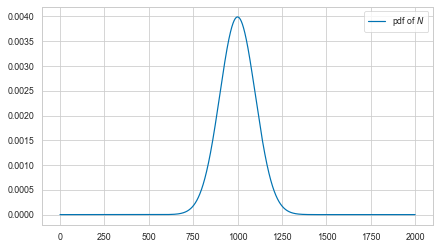

In [45]:
ns = np.linspace(0, 2000, 10000)
fNs = rvN.pdf(ns)
sns.lineplot(x=ns, y=fNs, label="pdf of $N$")

In [46]:
# import matplotlib.pyplot as plt
# filename = "figures/plot_of_pdf_of_rvN.pdf"

# with plt.rc_context({"figure.figsize":(7,3)}):
#     ns = np.linspace(0, 2000, 10000)
#     fNs = rvN.pdf(ns)
#     ax = sns.lineplot(x=ns, y=fNs, label="pdf of $N$")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

The cumulative distribution is the integral of the probability density function:
$$
   F_N(b) = \textrm{Pr}(N \leq b) = \int_{-\infty}^b f_N(n) \, dn
$$


<AxesSubplot:>

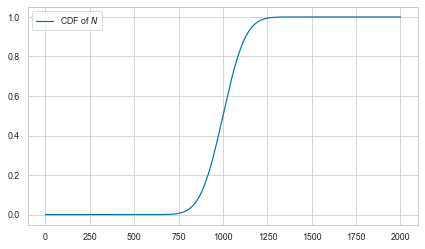

In [47]:
ns = np.linspace(0, 2000, 10000)
FNs = rvN.cdf(ns)
sns.lineplot(x=ns, y=FNs, label="CDF of $N$")

In [48]:
# import matplotlib.pyplot as plt
# filename = "figures/plot_of_CDF_of_rvN.pdf"

# with plt.rc_context({"figure.figsize":(7,3)}):
#     ns = np.linspace(0, 2000, 10000)
#     FNs = rvN.cdf(ns)
#     ax = sns.lineplot(x=ns, y=FNs, label="CDF of $N$")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

### Properties of the distribution

In [49]:
rvN.mean()

1000.0

In [50]:
rvN.std()

100.0

In [51]:
rvN.var()

10000.0

In [52]:
np.sqrt( rvN.var() )  # = rvN.std()

100.0

In [53]:
rvN.median()

1000.0

In [54]:
rvN.support()

(-inf, inf)

### Computing probabilities

Suppose you want to compute the probability of the outcome $\{ a \leq N \leq b \}$
for the random variable $N$.

In [55]:
# Pr({800 < N < 1200}) = integral of f_N between 800 and 1200
quad(rvN.pdf, 800, 1200)[0]

0.9544997361036417

In [56]:
# Pr({800 < N < 1200}) = F_N(1200) - F_N(800)
rvN.cdf(1200) - rvN.cdf(800)

0.9544997361036416

### Computing quantiles

The inverse question is to find the interval $(-\infty, n_q]$ that contains proportion $q$ of the total probability.

For example the $q=0.25$ quantile is located at

In [57]:
# first quartile
rvN.ppf(0.25)

932.5510249803918

In [58]:
# verify that Pr({N<932.5510249803918)}) == 0.25
rvN.cdf(932.5510249803918)

0.25

In [59]:
# second quartile == median
rvN.ppf(0.5)

1000.0

In [60]:
# third quartile
rvN.ppf(0.75)

1067.4489750196083

#### Left tail

In [61]:
rvN.ppf(0.05)

835.5146373048527

#### Right tail

In [62]:
rvN.ppf(0.95)

1164.4853626951472

#### Computing confidence intervals

To compute a 90% confidence interval for the random variable $N$,
we can use the `rvN.interval()` method.

In [63]:
rvN.interval(0.90)

(835.5146373048527, 1164.4853626951472)

Note the method `rvN.interval(0.90)` is just a shortcut for computing `(rvN.ppf(0.05),rvN.ppf(0.95))`.

### Generating random observations

Let's say you want to generate $n=10$ observations from the random variable $N$.
You can do this by calling the method `rvN.rvs(n)`.

In [64]:
ns = rvN.rvs(10)
ns

array([1178.86284734, 1043.65098505, 1009.64974681,  813.65072966,
        972.26117975,  964.52410207,  991.72585185,  937.29993232,
        995.6181831 ,  952.27819696])

In [65]:
ns_mean = sum(ns)/len(ns)
ns_mean

985.9521754922469

### Computing expectations

Suppose the distributor accepts only bottles contain between 800 ml and 1200 ml,
and you'll receive a receive payment of $\$2$ for each bottle.
Bottles outside that range get rejected and you don't get paid for them.

In [66]:
def payment(n):
    if 800 <= n and n <= 1200:
        return 2
    else:
        return 0

In [67]:
# get paid if in spec
payment(1050)

2

In [68]:
# don't get paid if out of spec
payment(1250)

0

In [69]:
rvN.expect(payment, lb=0, ub=2000)

1.9089994722069916

<AxesSubplot:>

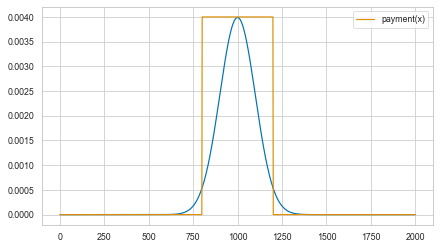

In [70]:
xs = np.linspace(0, 2000, 1000)
ys = [payment(x)/500 for x in xs]

sns.lineplot(x=xs, y=rvN.pdf(xs))
sns.lineplot(x=xs, y=ys, label="payment(x)")

## Discussion

### Theoretical calculus topics




In [71]:
from sympy import symbols

x, a, b, i, m, n = symbols("x a b i m n")
x

x

In [72]:
expr = b + m*x
expr

b + m*x

In [73]:
from sympy import srepr

srepr(expr)

"Add(Symbol('b'), Mul(Symbol('m'), Symbol('x')))"

#### Limits


In [74]:
from sympy import limit, exp, oo

limit(exp(x)/x**100, x, oo) 

oo

In [75]:
# # EXAMPLE 2: ... consider segtment of length delta
# delta = (b - a)/n

# zero length...
# limit(delta, n, oo)

# but still add up to whole interval...
# summation(delta, (i, 0, n-1))

#### Derivatives


In [76]:
from sympy import diff

f = b + m*x

diff(f, x)

m

The derivative function of $f(x) = mx +b$ is $f'(x)=m$.

In [77]:
f = c/2 * x**2

diff(f, x)

c*x

The derivative function of $f(x) = \frac{c}{2}x^2$ is $f'(x)=cx$.

In [78]:
from sympy import log, exp, sin
f = exp(x) + sin(x) + log(x)
f

exp(x) + log(x) + sin(x)

In [79]:
diff(f)

exp(x) + cos(x) + 1/x

#### Optimization algorithms



In [80]:
def derivative_descent(f, x0=0, alpha=0.01, tol=1e-11):
    """
    Computes the minimum of SymPy expression `f` using
    the gradient descent algorithm in one dimension.
    """
    x_i = x0
    delta = float("inf")
    while delta > tol:
        # print('current', x_i, delta)
        df_at_x_i = diff(f, x).subs({x:x_i})
        x_next = x_i - alpha*df_at_x_i
        delta = abs(x_next - x_i)
        x_i = x_next
    return x_i

Let's find the minimum value of the function $f(x) = (x-5)^2$ using the `derivative_descent` algorithm.

In [81]:
f = (x-5)**2

argmin_f = derivative_descent(f)
argmin_f

4.99999999951256

The solution is roughly accurate to roughly `tol`*10 = `1e-10`  decimals.

In [82]:
float(argmin_f - 5)

-4.874394221587863e-10

#### Using SciPy optimization functions

Let's solve the same optimization problem using the function `minimize` from `scipy.optimize`.

In [83]:
from scipy.optimize import minimize

def f(x):
    return (x-5)**2

res = minimize(f, x0=0)

res["x"][0]  # = argmin f(x)

4.99999997455944

#### Riemann sums


#### Fundamental theorem of calculus


In [84]:
from sympy import diff, integrate, log, exp, sin

f = log(x) + exp(x) + sin(x)

In [85]:
F = integrate(f)
F

x*log(x) - x + exp(x) - cos(x)

In [86]:
diff(F)

exp(x) + log(x) + sin(x)

In [87]:
diff(integrate(f)) == f

True

In [88]:
integrate(diff(f)) == f

True

### Bulk of the normal distribution

How much of the total probability "weight" lies within $k$ standard deviations of the mean?

$$
\textrm{Pr}(\mu_N - k\sigma_N \leq N \leq \mu_N + k\sigma_N) \ = \ p_k.
$$

In [89]:
from scipy.integrate import quad
from scipy.stats.distributions import norm
rvN = norm(1000, 100)

In [90]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    I_k = [mu - k*sigma, mu + k*sigma]
    p_k = quad(rvN.pdf, *I_k)[0]
    print(f"p_{k} = Pr( N in {I_k} ) = {p_k:.3f}")

p_1 = Pr( N in [900.0, 1100.0] ) = 0.683
p_2 = Pr( N in [800.0, 1200.0] ) = 0.954
p_3 = Pr( N in [700.0, 1300.0] ) = 0.997


The code below highlights the interval $I_k$ and computes the probability $p_k$.
Change the value of $k$ to get different plots.

0.9544997361036417

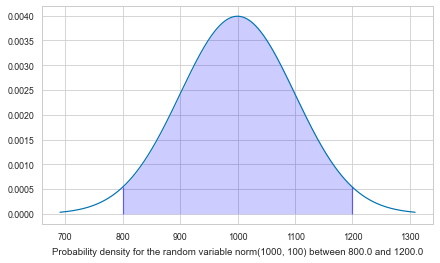

In [91]:
from plot_helpers import calc_prob_and_plot

k = 2              # number of standard deviations around the mean

# values of x in the interval 𝜇 ± k𝜎 = [𝜇-k𝜎, 𝜇+k𝜎]
I_k = [mu-k*sigma, mu+k*sigma]
p_k, _ = calc_prob_and_plot(rvN, *I_k)
p_k

Try changing the value of the variable `k` in the above code cell.

### Tails of the normal distribution

We're often interested in tail ends of the distribution, which contain the unlikely events.

In [92]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
        # compute the probability in the left tail (-∞,𝜇-k𝜎]
        x_l = mu - k*sigma
        p_l = quad(rvN.pdf, rvN.ppf(0.0000000001), x_l)[0]
        # compute the probability in the right tail [𝜇+k𝜎,∞)
        x_r = mu + k*sigma
        p_r = quad(rvN.pdf, x_r, rvN.ppf(0.9999999999))[0]
        # add together to get total probability in the tails
        p_tails = p_l + p_r
        print(f"Pr( N<{x_l} or N>{x_r} ) = {p_tails:.4f}")

Pr( N<900.0 or N>1100.0 ) = 0.3173
Pr( N<800.0 or N>1200.0 ) = 0.0455
Pr( N<700.0 or N>1300.0 ) = 0.0027


The code below highlights the tails of the distribution and computes the sum of their probability.

Pr( {N<800.0} ∪ {N>1200.0} ) = 0.0455


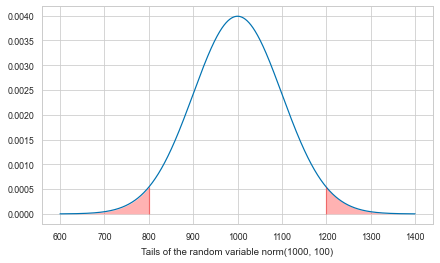

In [93]:
from plot_helpers import calc_prob_and_plot_tails

mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable


k = 2              # number of standard deviations around the mean

# the distribution's left tail (-∞,𝜇-k𝜎]
x_l = mu - k*sigma
# the distribution's right tail [𝜇+k𝜎,∞)
x_r = mu + k*sigma
p_tails, _ = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400])

print(f"Pr( {{N<{x_l}}} ∪ {{N>{x_r}}} ) = {p_tails:.4f}")

Try changing the value of the variable `k` in the above code cell.

The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are $k=2$ standard deviations away from the mean (more precisely, we should use $k=1.96$ to get exactly 5%). We'll use this facts later in STATS to define a *cutoff value* for events that are unlikely to occur by chance.

# FIGURES GEN

In [94]:
from plot_helpers import plot_pdf_and_cdf

(<Figure size 504x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Probability density function'}>,
        <AxesSubplot:title={'center':'Cumulative distribution function'}>],
       dtype=object))

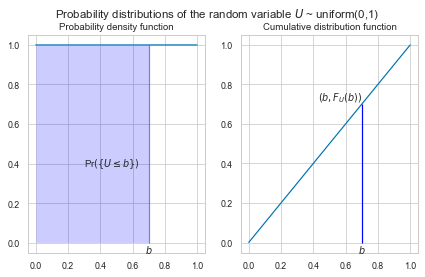

In [95]:
from scipy.stats.distributions import uniform
rvU = uniform(0, 1)
plot_pdf_and_cdf(rvU, 0.7, rv_name="U")

In [96]:
# filename = "figures/uniform_pdf_and_CDF_until_b.pdf"

# with plt.rc_context({"figure.figsize":(10,5)}):
#     fig, axs = plot_pdf_and_cdf(rvU, 0.7, rv_name="U")
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

(<Figure size 504x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Probability density function'}>,
        <AxesSubplot:title={'center':'Cumulative distribution function'}>],
       dtype=object))

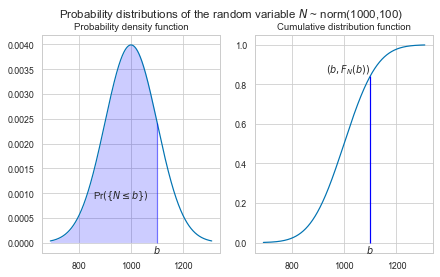

In [97]:
from scipy.stats.distributions import norm
mean = 1000
std = 100
rvN = norm(mean, std)

plot_pdf_and_cdf(rvN, 1100, rv_name="N")

In [98]:
# filename = "figures/normal_pdf_and_CDF_until_b.pdf"

# from scipy.stats.distributions import norm
# mean = 1000
# std = 100
# rvN = norm(mean, std)

# with plt.rc_context({"figure.figsize":(10,5)}):
#     fig, axs = plot_pdf_and_cdf(rvN, 1100, rv_name="N")
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

n = 1 interval contains 0.6826894921370859
n = 2 interval contains 0.9544997361036417
n = 3 interval contains 0.99730020393674


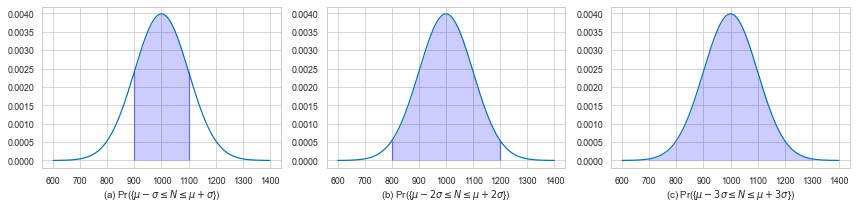

In [99]:
import matplotlib.pyplot as plt
from plot_helpers import calc_prob_and_plot

filename = "figures/bulk_of_the_distribution_panel.pdf"

mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 1
    bulk_interval1 = [mu-n*sigma, mu+n*sigma]
    p1, ax1 = calc_prob_and_plot(rvN, *bulk_interval1, xlims=[600, 1400], ax=ax1,
                                 title="(a) Pr({$\mu-\sigma \leq N \leq \mu+\sigma$})")
    print("n =", n, "interval contains", p1)

    n = 2
    bulk_interval2 = [mu-n*sigma, mu+n*sigma]
    p2, ax2 = calc_prob_and_plot(rvN, *bulk_interval2, xlims=[600, 1400], ax=ax2,
                                 title="(b) Pr({$\mu-2\sigma \leq N \leq \mu+2\sigma$})")
    print("n =", n, "interval contains", p2)

    n = 3
    bulk_interval3 = [mu-n*sigma, mu+n*sigma]
    p3, ax2 = calc_prob_and_plot(rvN, *bulk_interval3, xlims=[600, 1400], ax=ax3,
                                 title="(c) Pr({$\mu-3\sigma \leq N \leq \mu+3\sigma$})")
    print("n =", n, "interval contains", p3)
    
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


p1=0.6826894921370859
p2=0.04550026389615838
p3=0.002699796063060157



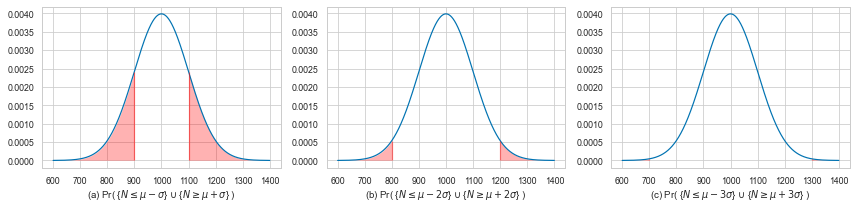

In [100]:
filename = "figures/tails_of_the_distribution_panel.pdf"


from plot_helpers import calc_prob_and_plot_tails




mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 1
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title1 = "(a) Pr( {$N \leq \mu-\sigma$} $\cup$ {$N \geq \mu+\sigma$} )"
    p2, ax1 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax1, title=title1)

    n = 2
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title2 = "(b) Pr( {$N \leq \mu-2\sigma$} $\cup$ {$N \geq \mu+2\sigma$} )"
    p2, ax2 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax2, title=title2)

    n = 3
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title3 = "(c) Pr( {$N \leq \mu-3\sigma$} $\cup$ {$N \geq \mu+3\sigma$} )"
    p3, ax3 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax3, title=title3)

    print(f"{p1=}\n",f"{p2=}\n",f"{p3=}\n", sep="")

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


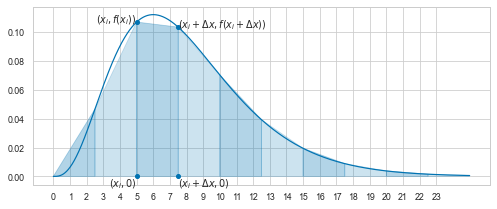

In [101]:
filename = "figures/plot_of_trapezoid_under_chi2_df_eq_8.pdf"

import matplotlib.pyplot as plt
from scipy.stats.distributions import chi2

n = 10

X2 = chi2(df=8)
f = X2.pdf

a = 0
b = 25


with plt.rc_context({"figure.figsize":(7,3)}):

    # x and y values for the trapezoid rule
    xs = np.linspace(a, b, n+1)
    ys = f(xs)

    # X and Y values for plotting y=f(x)
    X = np.linspace(a, b, 10000)
    Y = f(X)
    plt.plot(X,Y)
    plt.xticks(range(0,b-1))
    ax = plt.gca()
    # ax.set_title('Approximation to the area under $f(x)$ using n = {} trapezoids.'.format(n), y=0, pad=-30)


    for i in range(n):
        xcoords = [xs[i], xs[i],    xs[i+1],    xs[i+1] ]
        ycoords = [0,     f(xs[i]), f(xs[i+1]), 0      ]
        alpha = 0.2 if i%2==1 else 0.3
        plt.fill(xcoords, ycoords, 'b', edgecolor='b', alpha=alpha)
        if i == 2:
            plt.plot(xs[i],   0,          marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i],   0,          '$(x_i, 0)$', ha='right', va='top')
            plt.plot(xs[i],   f(xs[i]),    marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i],   f(xs[i]),    '$(x_i, f(x_i))$', ha='right')
            plt.plot(xs[i+1], 0,          marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i+1], 0,          '$(x_i+\Delta x, 0)$', ha='left', va='top')
            plt.plot(xs[i+1], f(xs[i+1]),  marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i+1], f(xs[i+1]), '$(x_i+\Delta x, f(x_i+\Delta x))$')


    ax.figure.tight_layout()
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


# CUT MATERIAL

#### CUT EXAMPLE PLOT OF PDF (used to be in Calculus section)

<AxesSubplot:>

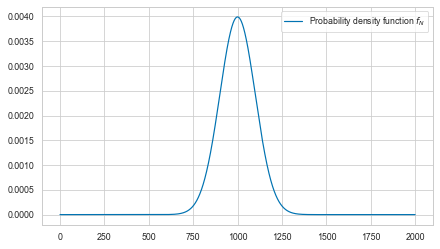

In [102]:
from scipy.stats.distributions import norm

# define normally distributed random variable with 𝜇=1000 and 𝜎=100
rvN = norm(1000, 100)

ns = np.linspace(0, 2000, 10000)
fNs = rvN.pdf(ns)
sns.lineplot(x=ns, y=fNs, label="Probability density function $f_N$")

In [103]:
# import matplotlib.pyplot as plt
# filename = "figures/graph_of_pdf_of_rvN.pdf"

# with plt.rc_context({"figure.figsize":(7,3)}):
#     x = np.linspace(0, 2000, 10000)
#     fN = rvN.pdf(x)
#     ax = sns.lineplot(x=x, y=fN)
#     ax.figure.tight_layout()
#     ax.set_title("Probability density function for the distribution $\mathcal{N}(1000,100)$")
#     ax.set_xlabel('$x$')
#     ax.set_ylabel('$f_N(x)$')
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

### Example probability calculation

What is the probability of observing a value between 800 and 900.

In [104]:
from scipy.integrate import quad

# Pr(800 < X < 900) = integral of f_X between 800 and 900
quad(rvN.pdf, 800, 900)[0]

0.13590512198327784

(0.49996832875816705,
 <AxesSubplot:title={'center':'Probability density for the random variable norm(1000, 100) between 600 and 1000'}>)

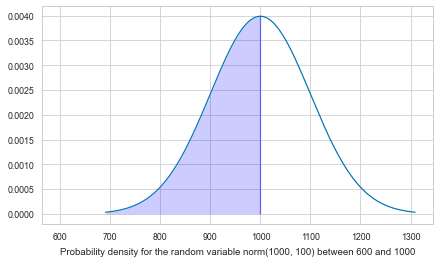

In [105]:
calc_prob_and_plot(rvN, 600, 1000)

### Cumulative density function (CDF)


In [106]:
# Pr(800 < X < 900) = F(900) - F(800)
rvN.cdf(900) - rvN.cdf(800)

0.13590512198327787

### The inverse-CDF function

In [107]:
rvN.ppf(0.6)

1025.33471031358

In [108]:
rvN.cdf(1025.33471031358)

0.6000000000000001

#### EARLY ATTEMPTS AT EXPECTATIONS CALCULATIONS

In [109]:
from sympy import Rational
integrate( (u-Rational(1,2))**2, (u,0,1) )

1/12

In [110]:
from scipy.stats.distributions import uniform

xs = np.linspace(0, 1, 1000)
rvU = uniform(0, 1)

In [111]:
from scipy.integrate import trapz

# mean
y1 = xs*rvU.pdf(xs)
mu = trapz(y1, xs)
mu

0.5

In [112]:
# variance
y2 = (xs-mu)**2 * rvU.pdf(xs)
sigma2 = trapz(y2, xs)
sigma2

0.08333350033383399

In [113]:
rvU.var()

0.08333333333333333

#### Alt

In [114]:
from scipy.stats.distributions import uniform

rvU = uniform(0, 1)

def xpU(x):
    return x*rvU.pdf(x)

quad(xpU, 0, 1)[0]

0.5

In [115]:
def xpU(x):
    muX = rvU.mean()
    return x*rvU.pdf(x)

quad(xpU, 0, 1)[0]

0.5

In [116]:
from scipy.integrate import simpson

xs = np.linspace(0, 1, 1000)
rvU = uniform(0, 1)


simpson(xs*rvU.pdf(xs), xs)

0.5